In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

C:\Users\Sabrina\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Importing and Reading

In [2]:
#opening file
county_cases = pd.read_csv("us_counties_covid19_daily.csv")
state_cases = pd.read_csv("us_states_covid19_daily.csv")
us_pop = pd.read_csv("pop_density.csv")


In [5]:
#reading state cases data
state_cases.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200714,AK,1579.0,147894.0,NaN,25.0,NaN,NaN,NaN,1.0,...,149473,0,0,14ec620d73185257a210b3f634cca1a8024dabe0,0,0,0,0,0,NaN
1,20200714,AL,57255.0,471834.0,NaN,1353.0,7123.0,NaN,931.0,NaN,...,529089,40,378,820cd0cab43d1d4994f54d9f80d70d3ce3257dbe,0,0,0,0,0,NaN
2,20200714,AR,29733.0,360566.0,NaN,445.0,1872.0,NaN,NaN,91.0,...,390299,8,36,815df27dba712c14d4f70512eb9b4b6523a88525,0,0,0,0,0,NaN
3,20200714,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,816,0,0,5fe9094de8fb3150e1522fdd21515350701f4636,0,0,0,0,0,NaN
4,20200714,AZ,128097.0,593846.0,NaN,3517.0,5942.0,970.0,NaN,674.0,...,721943,92,103,d6c2b3de47d952dae9beb085730d699788a6a0d9,0,0,0,0,0,NaN


In [6]:
state_cases.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,7.353000e+03,7338.000000,7.197000e+03,1002.000000,4739.000000,3816.000000,2426.000000,1016.000000,2125.000000,358.000000,...,7353.000000,7.353000e+03,7353.000000,7353.000000,7353.0,7353.0,7353.0,7353.0,7353.0,0.0
mean,2.020050e+07,23641.066367,2.150041e+05,1146.369261,944.740030,4762.790094,393.494641,698.634843,193.291294,179.209497,...,5679.778730,2.340355e+05,17.508500,36.328437,0.0,0.0,0.0,0.0,0.0,NaN
std,1.277514e+02,51134.566550,4.563350e+05,6082.048394,1840.093472,13280.463939,665.805766,605.724654,302.106943,115.781733,...,11494.390481,4.959991e+05,55.512375,282.722433,0.0,0.0,0.0,0.0,0.0,NaN
min,2.020012e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,-74189.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,2.020041e+07,512.250000,9.703000e+03,14.000000,93.000000,263.750000,66.000000,193.250000,26.000000,101.000000,...,248.000000,8.581000e+03,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,2.020051e+07,5241.000000,6.363000e+04,113.500000,369.000000,1160.000000,155.500000,520.500000,86.000000,144.500000,...,1794.000000,6.672900e+04,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,2.020061e+07,23795.000000,2.256250e+05,476.750000,906.500000,3777.500000,391.000000,1014.750000,207.000000,210.000000,...,6338.000000,2.446610e+05,14.000000,18.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,2.020071e+07,403175.000000,5.338447e+06,64400.000000,18825.000000,89995.000000,5225.000000,2662.000000,2425.000000,511.000000,...,165227.000000,5.674955e+06,1877.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
#reading county cases data
county_cases.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [8]:
county_cases.describe()

,fips,cases,deaths
count,327802.000000,331179.000000,331179.000000
mean,30856.578901,515.811715,26.896086
std,16099.782160,4195.071294,360.422561
min,1001.000000,0.000000,0.000000
25%,18127.000000,7.000000,0.000000
50%,29141.000000,32.000000,1.000000
75%,46047.000000,152.000000,4.000000
max,72153.000000,223977.000000,22795.000000


In [9]:
#reading US population data
us_pop.head()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,# DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# DENSITY RANKING EXPRESSED IN ORDER OF MOST D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
3,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29


# 2. Data Cleaning

In [43]:
#changing column names so when merging tables there will be no confusion
county_cases.rename(columns = {'cases':'cases in county'}, inplace = True)
county_cases.rename(columns = {'deaths':'deaths in county'}, inplace = True)
county_cases.head()


,date,county,state,fips,cases in county,deaths in county
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [11]:
#dropping columns that won't be relevant to our findings or columns with no data
state_cases.drop('hash', axis=1, inplace = True)
state_cases.drop('commercialScore', axis=1, inplace = True)
state_cases.drop('negativeRegularScore', axis=1, inplace = True)
state_cases.drop('negativeScore', axis=1, inplace = True)
state_cases.drop('positiveScore', axis=1, inplace = True)
state_cases.drop('score', axis=1, inplace = True)
state_cases.drop('grade', axis=1, inplace = True)
state_cases.drop('deathProbable', axis=1, inplace = True)
state_cases.drop('onVentilatorCurrently', axis=1, inplace = True)

#change date to datetime format for easier plotting
state_cases['date'] = pd.to_datetime(state_cases['date'],format = '%Y%m%d')
state_cases.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCumulative,...,deathConfirmed,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
0,2020-07-14,AK,1579.0,147894.0,NaN,25.0,NaN,NaN,NaN,NaN,...,17.0,2,40,2843,149473,149473,2883,149473,0,0
1,2020-07-14,AL,57255.0,471834.0,NaN,1353.0,7123.0,NaN,931.0,511.0,...,1136.0,1,1710,7775,529089,529089,9485,529089,40,378
2,2020-07-14,AR,29733.0,360566.0,NaN,445.0,1872.0,NaN,NaN,273.0,...,NaN,5,794,6531,390299,390299,7325,390299,8,36
3,2020-07-14,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60,0,0,816,816,0,816,0,0
4,2020-07-14,AZ,128097.0,593846.0,NaN,3517.0,5942.0,970.0,NaN,NaN,...,2208.0,4,4273,15244,721943,721943,19517,721943,92,103


In [12]:
#fixing US population data
#dropping first two rows because they were headers
us_pop = us_pop.drop([0,1])
us_pop.columns = us_pop.iloc[0]
us_pop = us_pop.drop([2,3])

#renaming columns and extracting state, population and population density
us_pop = us_pop.rename(columns = {'STATE_OR_REGION': 'state_name', '2010_POPULATION':'population', '2010_DENSITY':'population density'})
us_pop = us_pop[['state_name','population','population density']]

us_pop['population density'] = us_pop['population density'].str.replace(',','')

us_pop['population density'] = us_pop['population density'].astype(float)
us_pop['population'] = us_pop['population'].astype(float)

us_pop.head()




2,state_name,population,population density
4,Alabama,4779736.0,94.4
5,Alaska,710231.0,1.2
6,Arizona,6392017.0,56.3
7,Arkansas,2915918.0,56.0
8,California,37253956.0,239.1


In [13]:
#changing the state column in the state_cases dataframe to be full name of states instead of abbreviations
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

full_state_name = {abbrev: state for abbrev, state in states.items()}
state_cases['state_name'] = state_cases['state'].map(full_state_name)
state_cases


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCumulative,...,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,state_name
0,2020-07-14,AK,1579.0,147894.0,NaN,25.0,NaN,NaN,NaN,NaN,...,2,40,2843,149473,149473,2883,149473,0,0,Alaska
1,2020-07-14,AL,57255.0,471834.0,NaN,1353.0,7123.0,NaN,931.0,511.0,...,1,1710,7775,529089,529089,9485,529089,40,378,Alabama
2,2020-07-14,AR,29733.0,360566.0,NaN,445.0,1872.0,NaN,NaN,273.0,...,5,794,6531,390299,390299,7325,390299,8,36,Arkansas
3,2020-07-14,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,60,0,0,816,816,0,816,0,0,American Samoa
4,2020-07-14,AZ,128097.0,593846.0,NaN,3517.0,5942.0,970.0,NaN,NaN,...,4,4273,15244,721943,721943,19517,721943,92,103,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,53,0,0,2,2,0,2,0,0,Washington
7349,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,53,0,0,2,2,0,2,0,0,Washington
7350,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,53,0,0,2,2,0,2,0,0,Washington
7351,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,53,0,0,2,2,0,2,0,0,Washington


In [14]:
#check how many missing values there are 
missing_val = state_cases.isnull().sum()

#look at percentage data missing
total_data = len(state_cases.columns) * len(state_cases.index)
missing_percent = (missing_val.sum() / total_data) * 100

print(missing_percent)
print(missing_val)

27.761911238043428
date                           0
state                          0
positive                      15
negative                     156
pending                     6351
hospitalizedCurrently       2614
hospitalizedCumulative      3537
inIcuCurrently              4927
inIcuCumulative             6337
onVentilatorCumulative      6995
recovered                   3043
dataQualityGrade            1101
lastUpdateEt                 344
dateModified                 344
checkTimeEt                  344
death                        698
hospitalized                3537
dateChecked                  344
totalTestsViral             5052
positiveTestsViral          6487
negativeTestsViral          6471
positiveCasesViral          3474
deathConfirmed              5193
fips                           0
positiveIncrease               0
negativeIncrease               0
total                          0
totalTestResults               0
totalTestResultsIncrease       0
posNeg                  

In [15]:
#delete rows from state case table in which there is no positive, negative, or pending test case data
state_cases = state_cases.dropna(how='all',subset = ['positive','negative','pending'])

missing_val_dropped = state_cases.isnull().sum()
print(missing_val_dropped)




date                           0
state                          0
positive                       0
negative                     141
pending                     6336
hospitalizedCurrently       2599
hospitalizedCumulative      3522
inIcuCurrently              4912
inIcuCumulative             6322
onVentilatorCumulative      6980
recovered                   3028
dataQualityGrade            1086
lastUpdateEt                 344
dateModified                 344
checkTimeEt                  344
death                        696
hospitalized                3522
dateChecked                  344
totalTestsViral             5037
positiveTestsViral          6472
negativeTestsViral          6456
positiveCasesViral          3459
deathConfirmed              5178
fips                           0
positiveIncrease               0
negativeIncrease               0
total                          0
totalTestResults               0
totalTestResultsIncrease       0
posNeg                         0
deathIncre

# 3. Data Exploration

In [17]:
#divide cases by state and date to see how positive cases has changed over time by state
organized_state_cases = state_cases.groupby(by=['state','date'])
positive_state_cases = organized_state_cases.first().positive
positive_state_cases = pd.DataFrame(positive_state_cases)
positive_state_cases



positive
state date                
AK    2020-03-06       0.0
      2020-03-07       0.0
      2020-03-08       0.0
      2020-03-09       0.0
      2020-03-10       0.0
...                    ...
WY    2020-07-10    1790.0
      2020-07-11    1839.0
      2020-07-12    1862.0
      2020-07-13    1862.0
      2020-07-14    1951.0

[7338 rows x 1 columns]

C:\Users\Sabrina\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


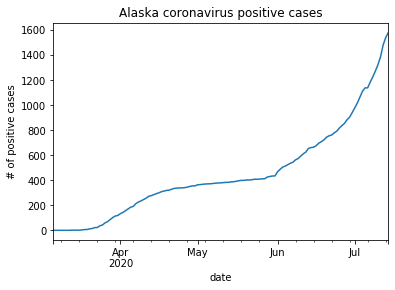

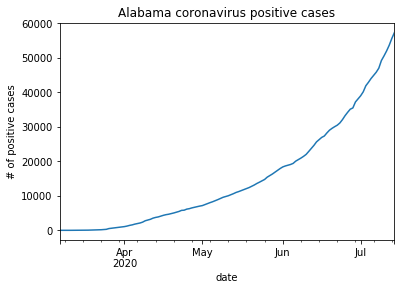

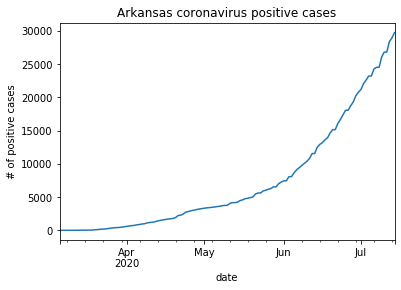

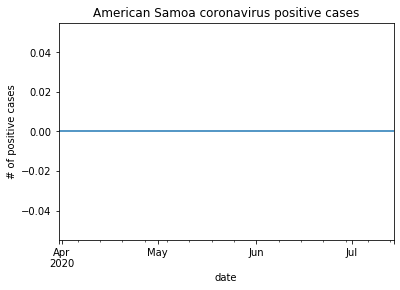

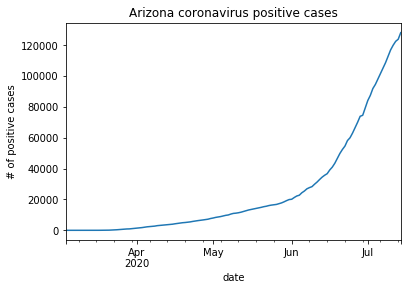

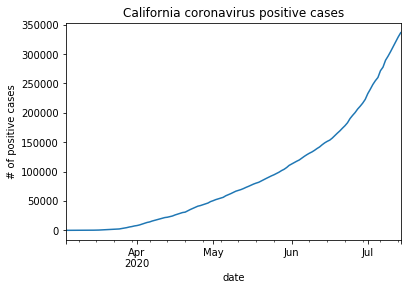

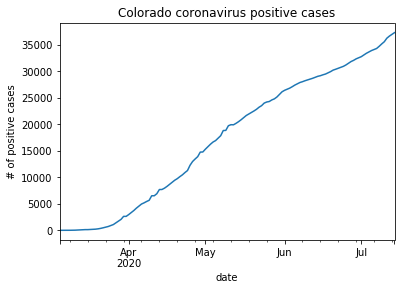

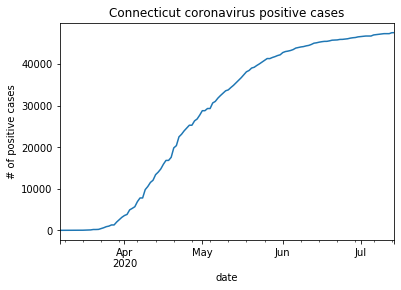

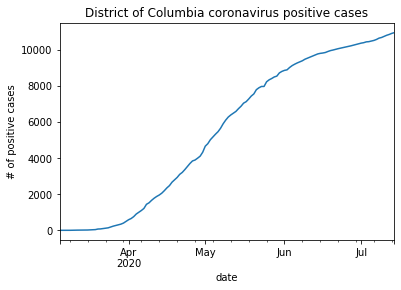

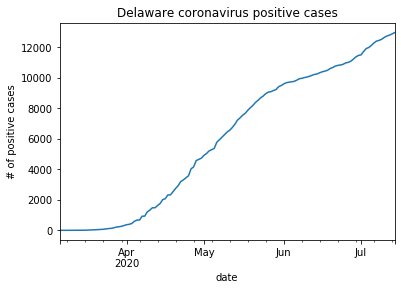

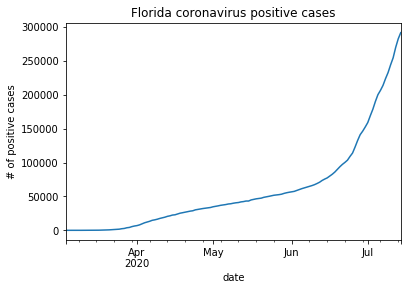

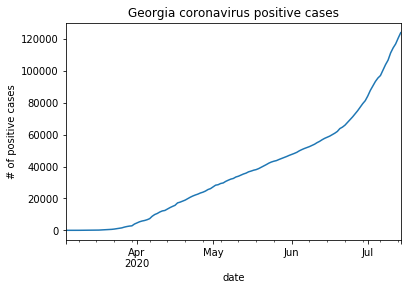

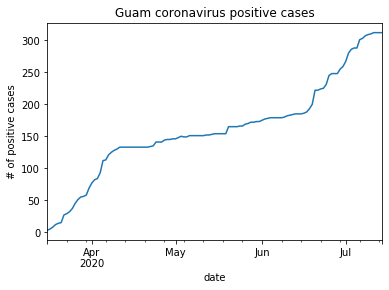

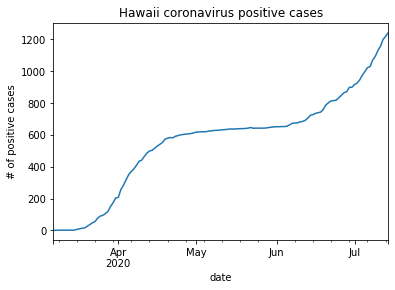

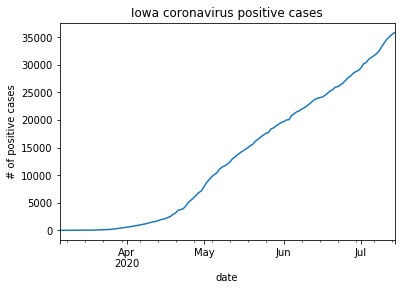

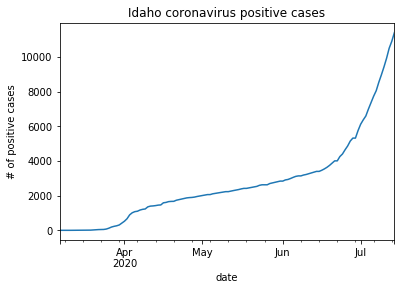

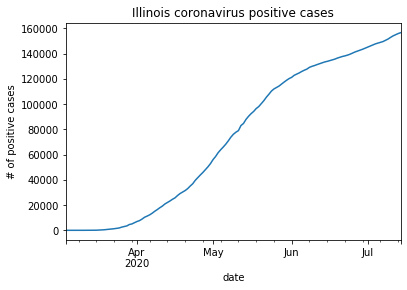

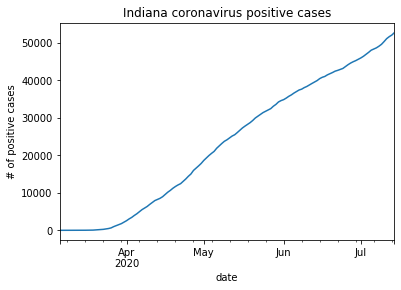

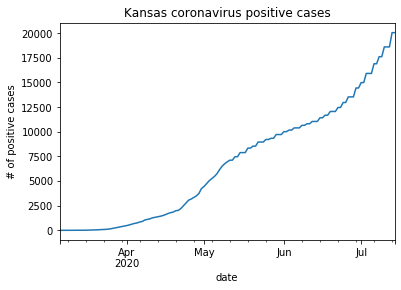

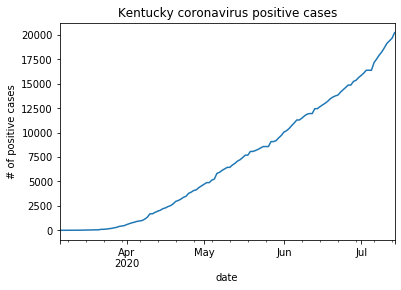

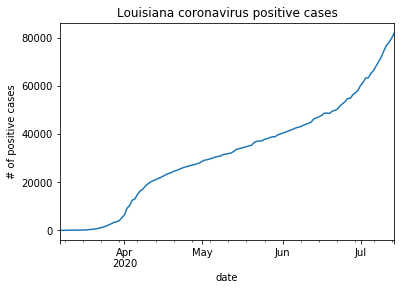

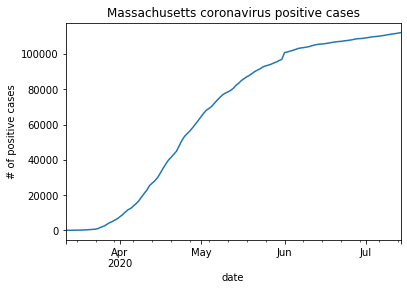

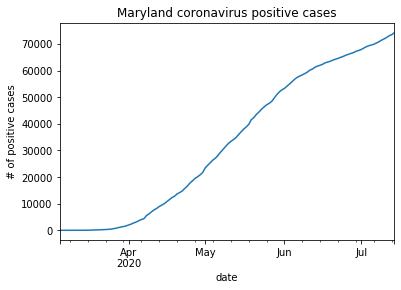

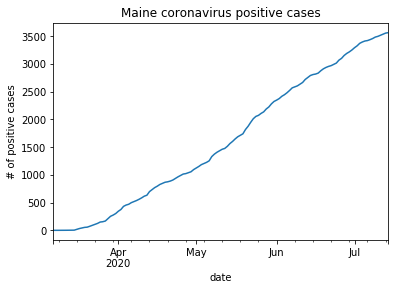

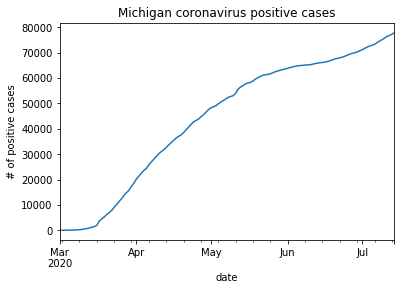

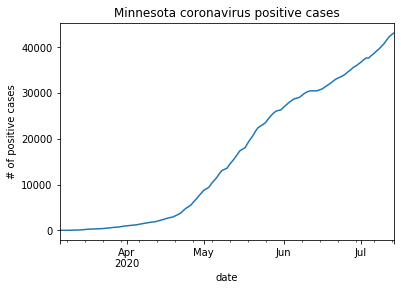

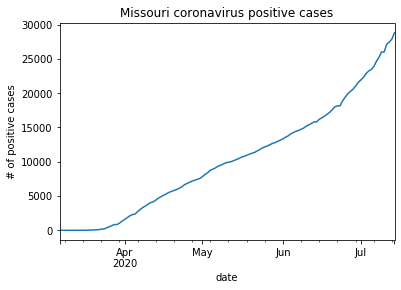

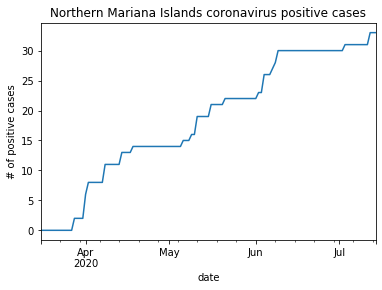

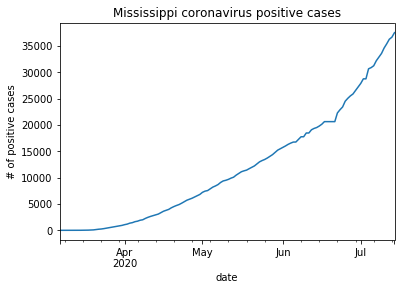

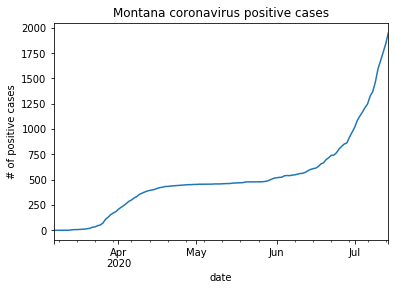

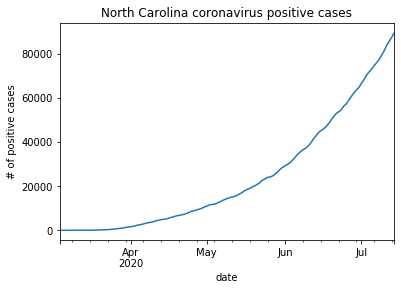

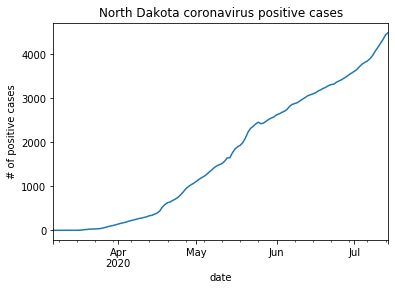

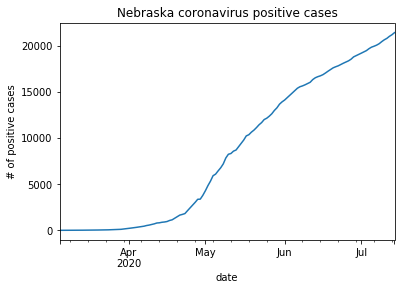

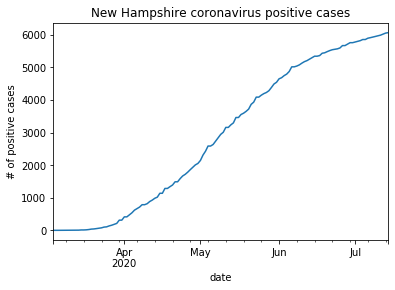

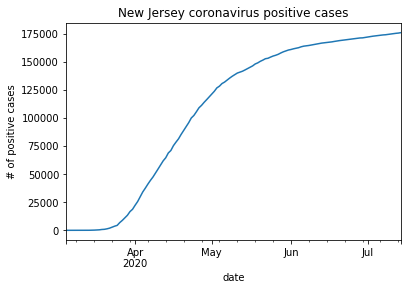

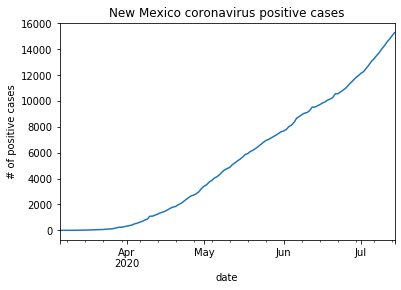

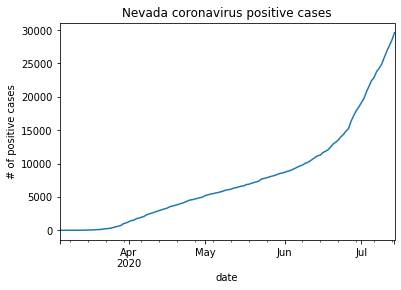

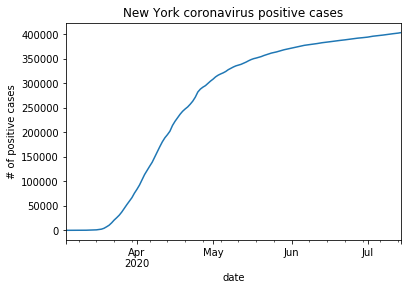

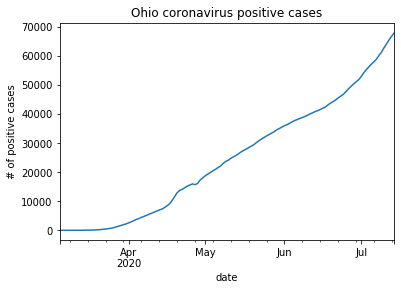

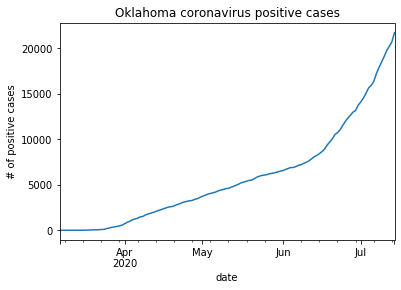

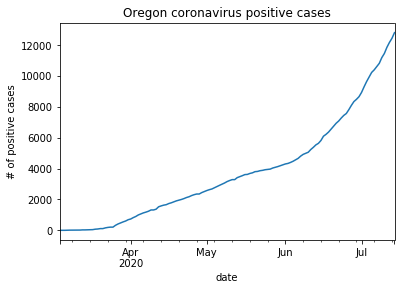

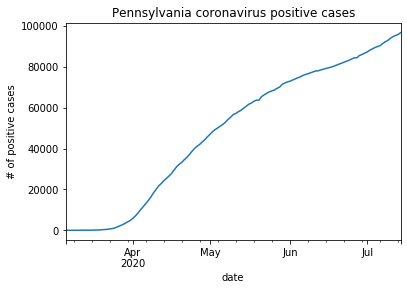

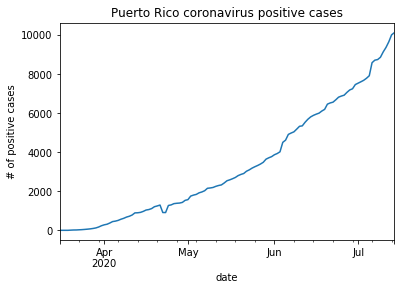

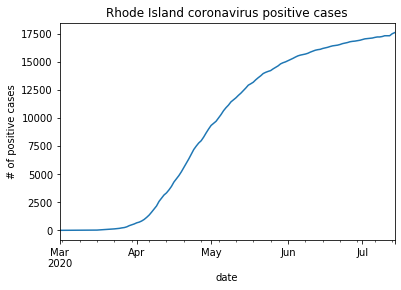

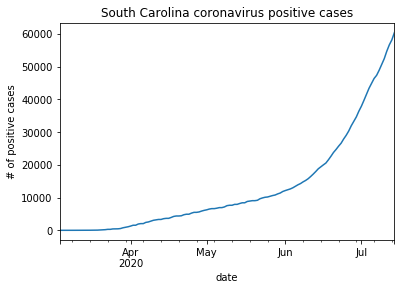

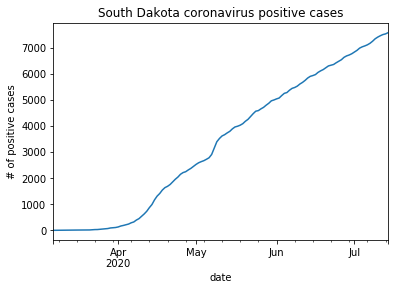

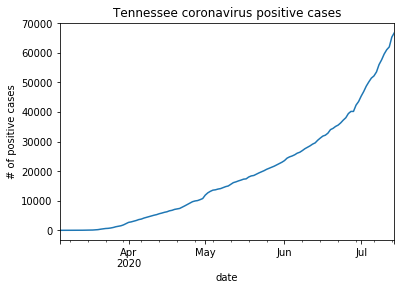

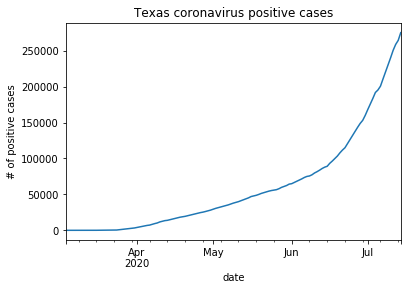

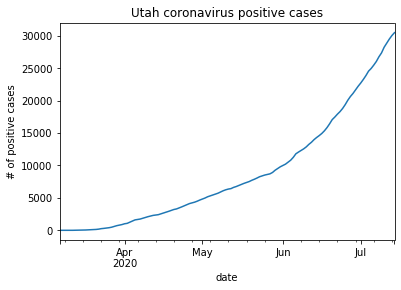

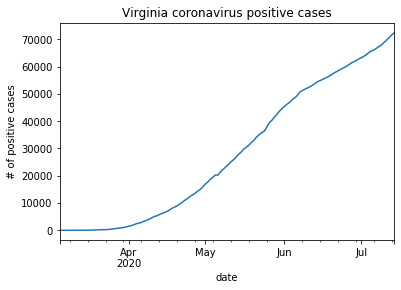

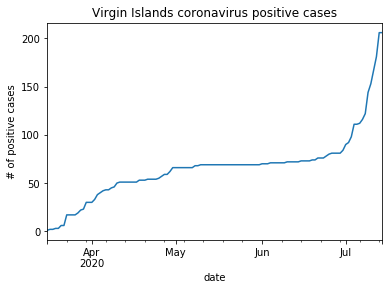

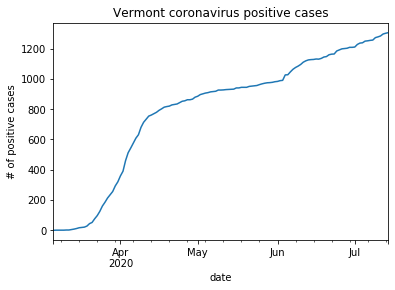

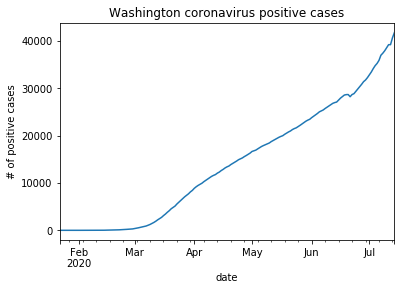

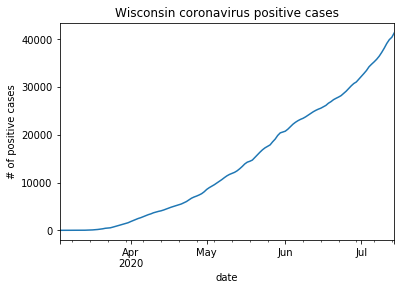

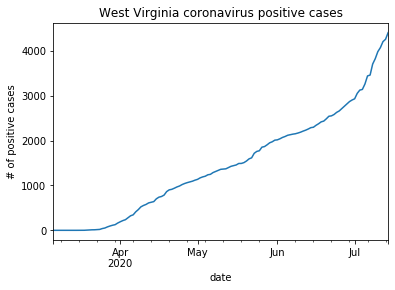

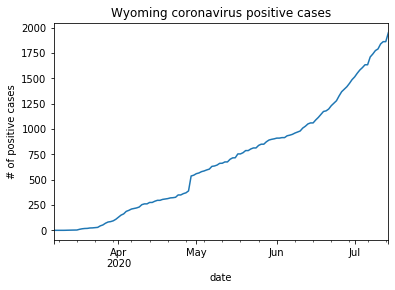

In [19]:
#graphing how positive cases have changed from March - July in each state

for states in list(state_cases.state_name.unique()):
    plot_counter = 1
    sub1 = fig.add_subplot(2,2,plot_counter)
    sub1 = specified_state_cases = state_cases[state_cases['state_name'] == states].plot(x='date',y='positive', legend = False)
    plt.title(states + ' coronavirus positive cases')
    plt.ylabel('# of positive cases')
    plot_counter = plot_counter + 1



Text(0.5, 1.0, 'total # of positive test cases by state')

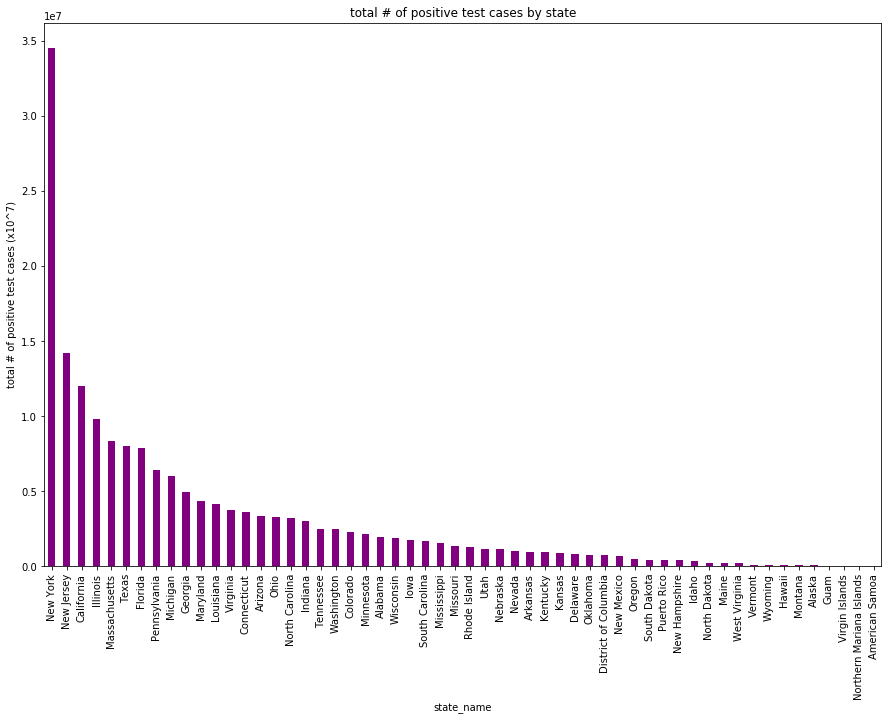

In [18]:
#graphing the total number of tests that are positive in each state
total_positive_cases = state_cases.groupby('state_name').positive.sum().sort_values(ascending = False)

plt.figure(figsize = (15,10))
total_positive_cases.plot(kind = 'bar',color='purple')
plt.ylabel('total # of positive test cases (x10^7)')
plt.title('total # of positive test cases by state')


state_name
New York                    213623603
California                  206108824
Florida                     104359983
Texas                        97274389
Illinois                     84697171
New Jersey                   75208416
Michigan                     58627829
Massachusetts                53080639
Georgia                      45637178
North Carolina               45091269
Pennsylvania                 44886903
Tennessee                    44345504
Ohio                         40510949
Louisiana                    39904066
Washington                   35882175
Virginia                     32279326
Minnesota                    29825218
Maryland                     29236794
Wisconsin                    28437290
Arizona                      25784034
Indiana                      25584664
Connecticut                  25000593
Alabama                      21709899
Utah                         20593341
Missouri                     20438092
Kentucky                     19530742
S

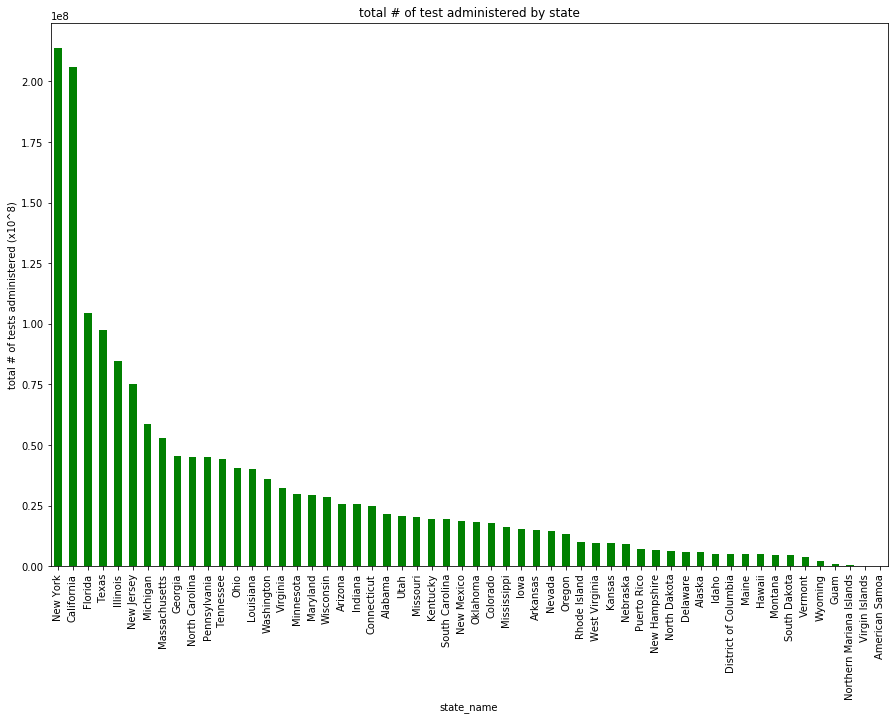

In [19]:
#graphing the total number of tests administered in each state
total_tests = state_cases.groupby('state_name').total.sum().sort_values(ascending = False)

plt.figure(figsize = (15,10))
total_tests.plot(kind = 'bar',color = 'green')
plt.ylabel('total # of tests administered (x10^8)')
plt.title('total # of test administered by state')

total_tests



,positive,total,positivePercentage
state_name,,,
New Jersey,14195355.0,75208416,18.874690
New York,34474680.0,213623603,16.138048
Massachusetts,8315627.0,53080639,15.666027
Maryland,4358772.0,29236794,14.908516
Connecticut,3608645.0,25000593,14.434238
Pennsylvania,6381865.0,44886903,14.217655
District of Columbia,729396.0,5162164,14.129656
Delaware,783403.0,5974249,13.112995
Arizona,3340201.0,25784034,12.954532


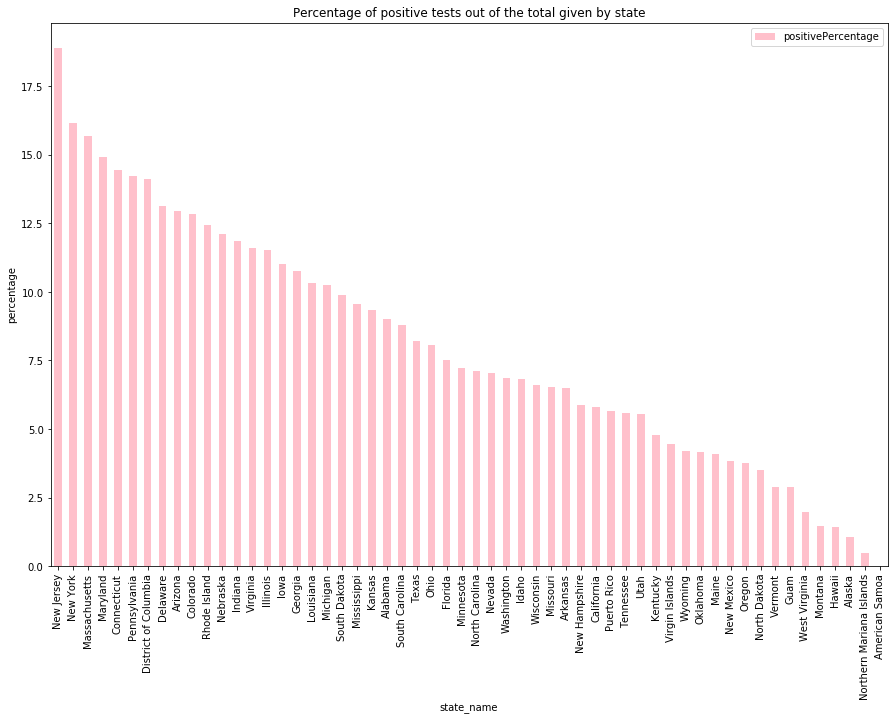

In [20]:
#graph percentage of total tests administered to the rate of tests that came back positive
total_positive_cases = state_cases.groupby('state_name').positive.sum().sort_values(ascending = False)

positive_test_percentage = pd.DataFrame(total_positive_cases).join(pd.DataFrame(total_tests),how='left',on='state_name')
positive_test_percentage['positivePercentage'] = positive_test_percentage.positive/positive_test_percentage.total*100
positive_test_percentage = positive_test_percentage.sort_values('positivePercentage',ascending=False)
positive_test_percentage

positive_test_percentage.plot(y='positivePercentage',kind='bar',figsize = (15,10), color = 'pink')
plt.title('Percentage of positive tests out of the total given by state')
plt.ylabel('percentage')

positive_test_percentage


Text(0.5, 1.0, 'total # of pending tests by state')

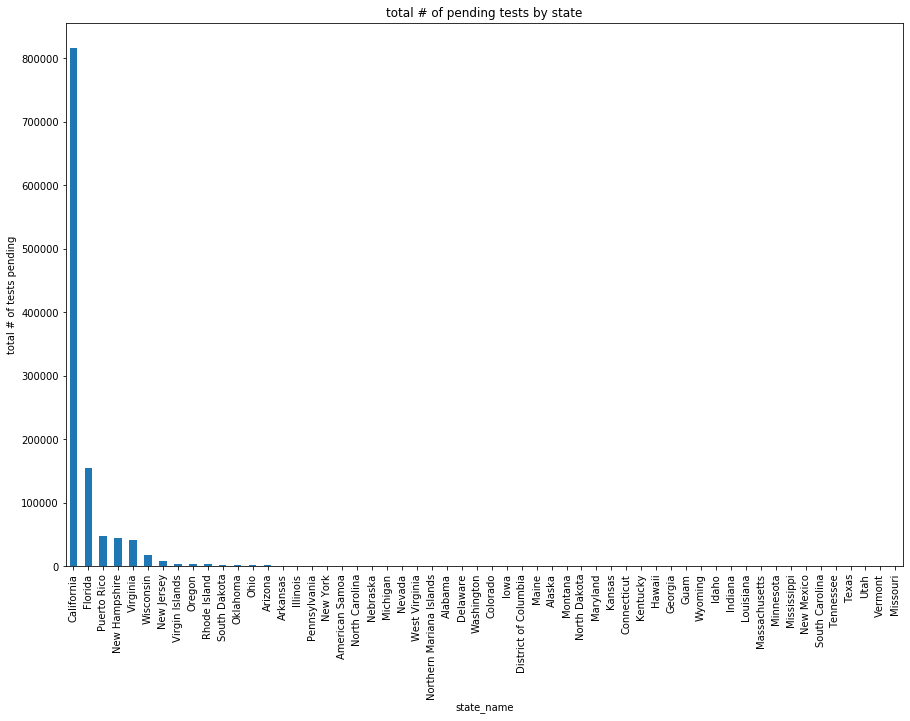

In [18]:
#taking a look at how many tests were pending per state
total_pending = state_cases.groupby('state_name').pending.sum().sort_values(ascending = False)

plt.figure(figsize = (15,10))
total_pending.plot(kind = 'bar')
plt.ylabel('total # of tests pending')
plt.title('total # of pending tests by state')



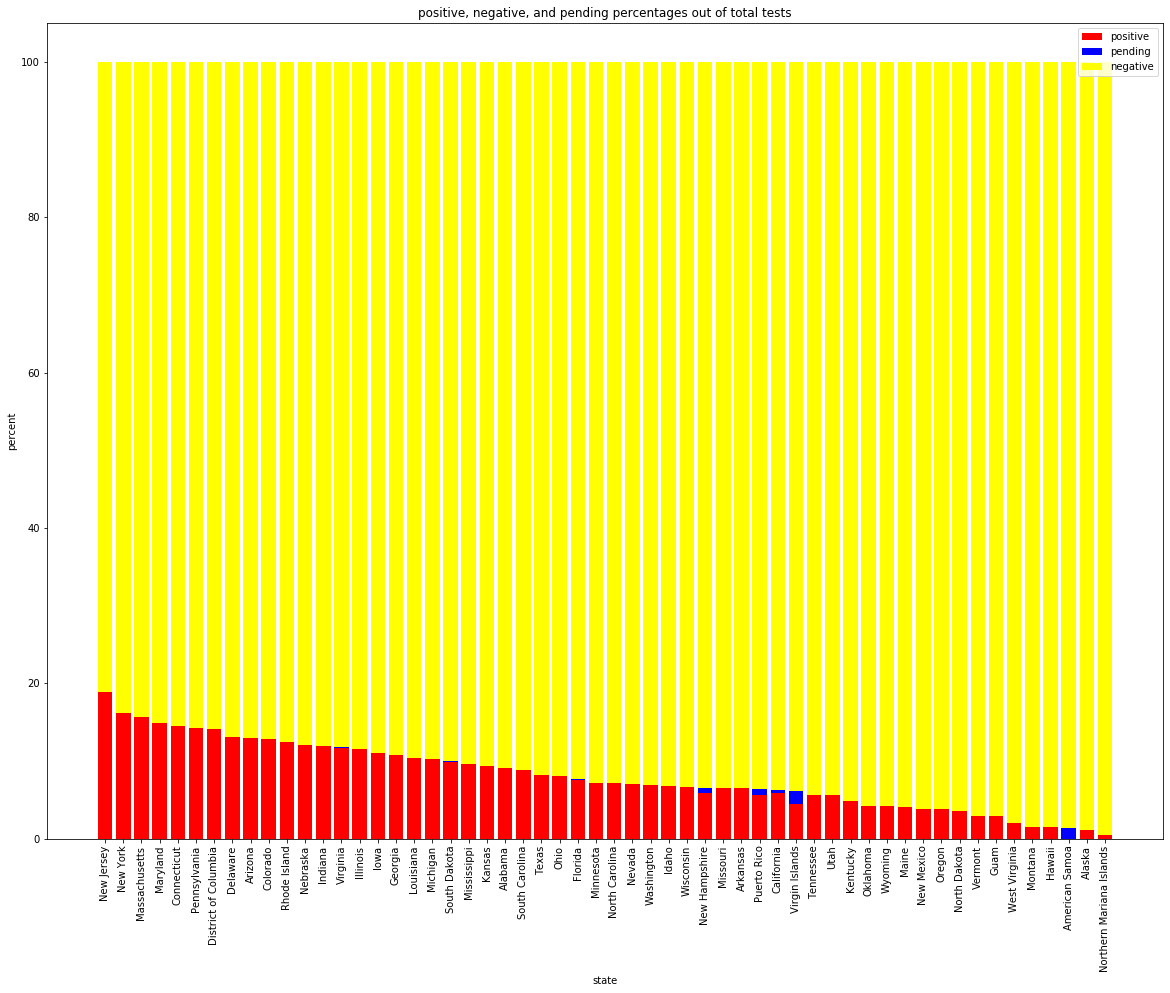

In [21]:
#graphing the percentage of negative, positive, and pending cases in a stacked bar chart
total_negative_cases = state_cases.groupby('state_name').negative.sum().sort_values(ascending = False)

test_percentages = pd.DataFrame(positive_test_percentage).join(pd.DataFrame(total_negative_cases),how='left',on='state_name')
test_percentages = pd.DataFrame(test_percentages).join(pd.DataFrame(total_pending),how='left',on='state_name')

test_percentages['negativePercentage'] = test_percentages['negative']/test_percentages['total'] * 100
test_percentages['pendingPercentage'] = test_percentages['pending']/test_percentages['total'] * 100
test_percentages['worstCaseResults'] = (test_percentages['positive'] + test_percentages['pending'])/test_percentages['total'] * 100

test_percentages = test_percentages.sort_values('worstCaseResults', ascending = False)

plt.figure(figsize = (20,15))
plt.xticks(rotation = 90)
plt.bar(x = test_percentages.index, height= test_percentages.positivePercentage,color = 'red')
plt.bar(x = test_percentages.index, height= test_percentages.pendingPercentage, bottom = test_percentages.positivePercentage, color = 'blue')
plt.bar(x = test_percentages.index, height= test_percentages.negativePercentage, bottom = test_percentages.positivePercentage + test_percentages.pendingPercentage, color = 'yellow')

plt.title('positive, negative, and pending percentages out of total tests')
plt.xlabel('state')
plt.ylabel('percent')
plt.legend(['positive','pending','negative'])


(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000., 40000000.]),
 <a list of 10 Text xticklabel objects>)

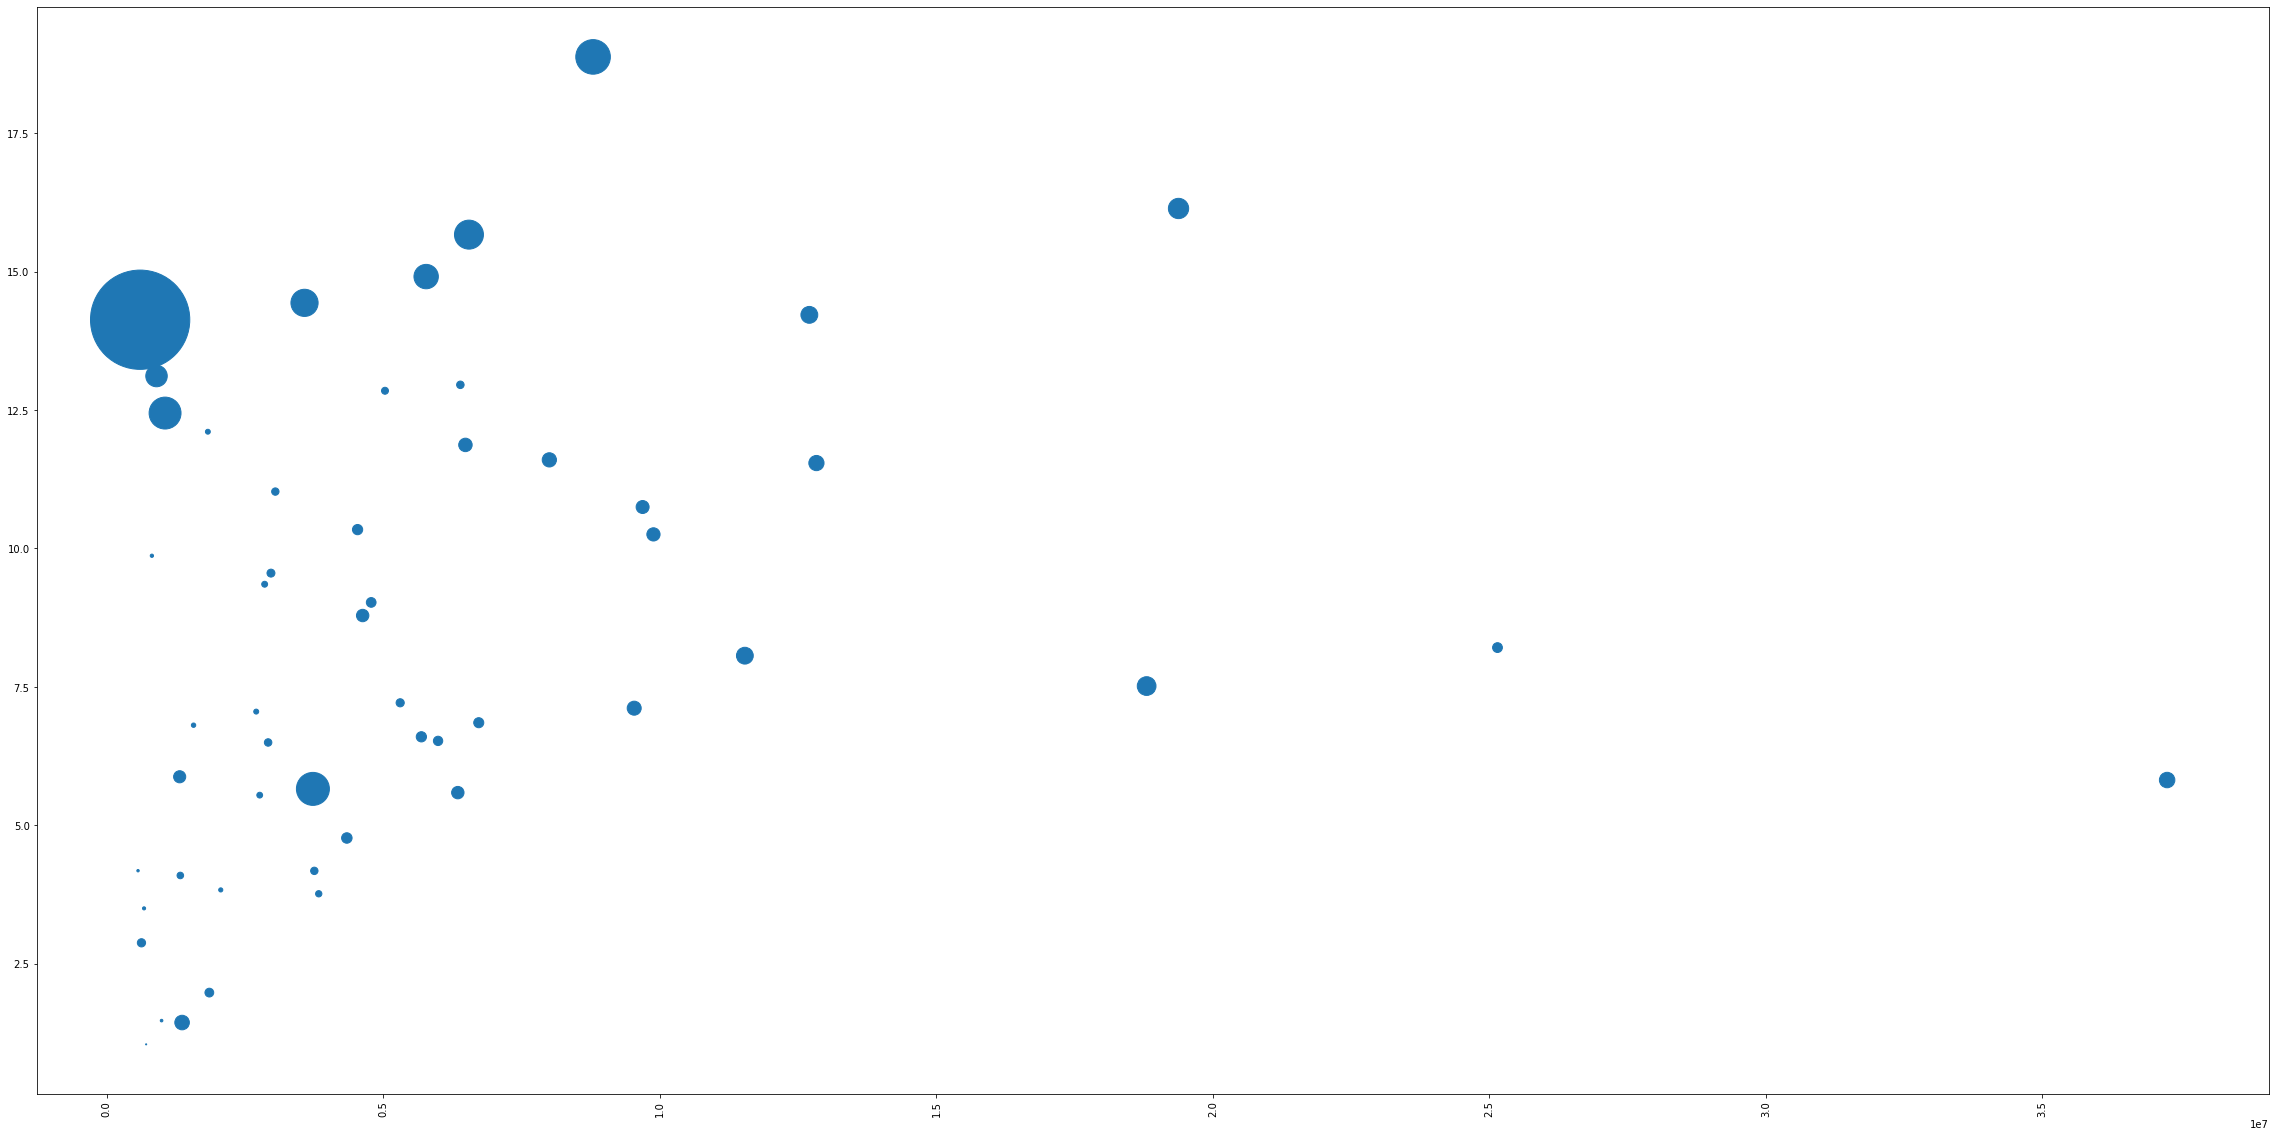

In [36]:
#graphing a bubble plot to see correlation between population, positivity rate, and population density
population_description = positive_test_percentage.merge(us_pop, how = 'left', on = 'state_name')

population_description = population_description.dropna(how='any',subset = ['population','population density'])
population_description

plt.figure(figsize = (40,20))
plt.scatter(x='population', y='positivePercentage',
             s= population_description['population density'],
             alpha=1, data=population_description)

plt.xticks(rotation = 90)



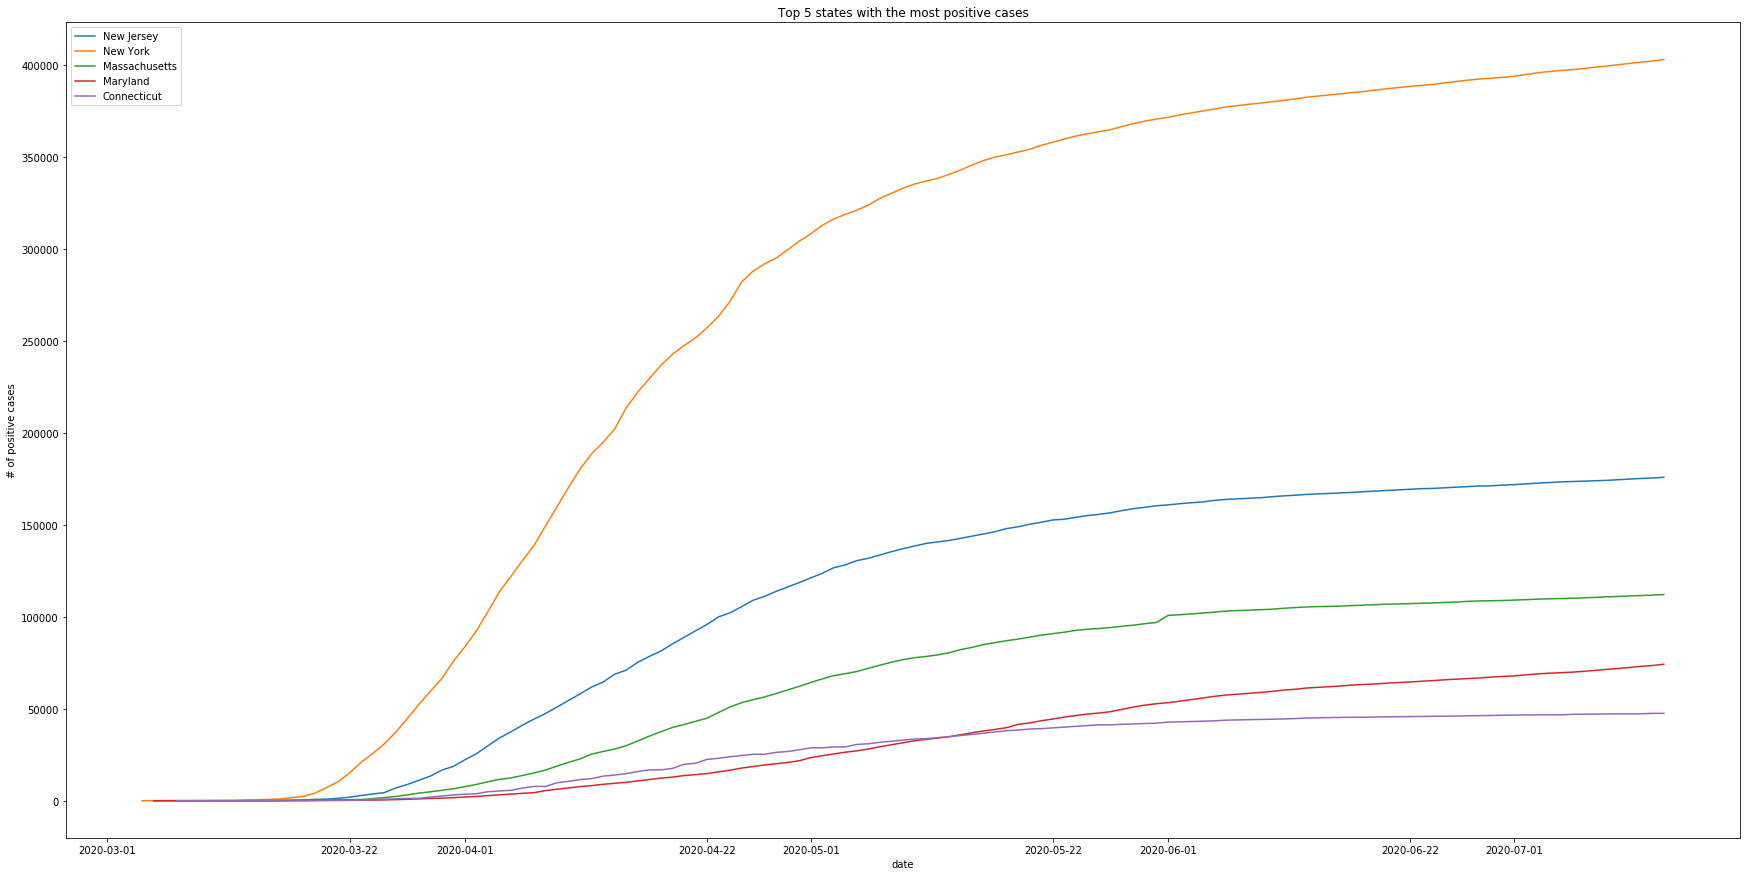

In [37]:
# Graphing the top 5 states with the highest positivity rate and how the positive cases have changed over time
plt.figure(figsize = (30,15))
plt.plot(state_cases[state_cases['state'] == 'NJ'].date, state_cases[state_cases['state'] == 'NJ'].positive, label = 'New Jersey')
plt.plot(state_cases[state_cases['state'] == 'NY'].date, state_cases[state_cases['state'] == 'NY'].positive, label = 'New York')
plt.plot(state_cases[state_cases['state'] == 'MA'].date, state_cases[state_cases['state'] == 'MA'].positive, label = 'Massachusetts')
plt.plot(state_cases[state_cases['state'] == 'MD'].date, state_cases[state_cases['state'] == 'MD'].positive, label = 'Maryland')
plt.plot(state_cases[state_cases['state'] == 'CT'].date, state_cases[state_cases['state'] == 'CT'].positive, label = 'Connecticut')

plt.title('Top 5 states with the most positive cases')
plt.xlabel('date')
plt.ylabel('# of positive cases')
plt.legend()



Text(0.5, 1.0, 'positivity rate of coronavirus')

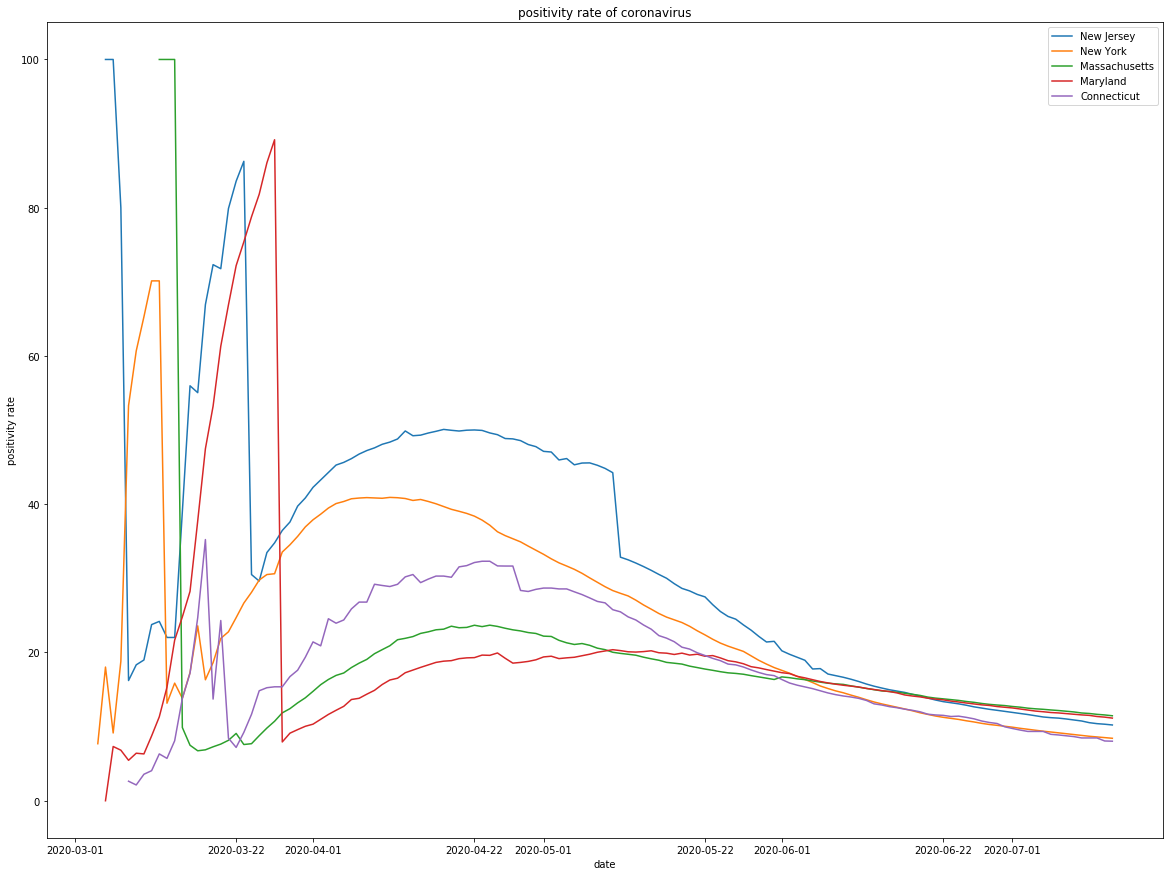

In [38]:
#Graphing positivity rate over time the top 5 states with the highest positivity rate
plt.figure(figsize = (20,15))
for state in ['New Jersey','New York','Massachusetts','Maryland','Connecticut']:
    state_positive = state_cases[state_cases['state_name'] == state][['date','positive','total']]
    state_positive['positivityRate'] = state_positive['positive']/state_positive['total'] * 100
    plt.plot(state_positive['date'], state_positive['positivityRate'], label = state)
plt.legend()
plt.xlabel('date')
plt.ylabel('positivity rate')
plt.title('positivity rate of coronavirus')

In [44]:
#Determining the county in each state that has the greatest sum of positive cases 
positive_county_cases = county_cases.groupby(['state','county'])['cases in county'].sum()
positive_county_cases = positive_county_cases.reset_index()

max_county_cases = positive_county_cases.groupby(['state'])['cases in county'].transform(max) == positive_county_cases['cases in county']
max_county_cases = positive_county_cases[max_county_cases].sort_values('cases in county', ascending = False)
max_county_cases



,state,county,cases in county
1846,New York,New York City,19163112
612,Illinois,Cook,6224131
204,California,Los Angeles,5409914
362,Florida,Miami-Dade,2115033
2282,Pennsylvania,Philadelphia,1924840
1321,Michigan,Wayne,1920862
101,Arizona,Maricopa,1889602
1232,Massachusetts,Middlesex,1816498
1764,New Jersey,Bergen,1698970
2691,Texas,Harris,1508940


,state,county,cases in county,total,county percentage of state
2029,Northern Mariana Islands,Unknown,2060,2060,100.000000
2883,Virgin Islands,Unknown,7860,7860,100.000000
548,Guam,Unknown,107967,107967,100.000000
319,District of Columbia,District of Columbia,718628,718628,100.000000
1737,Nevada,Clark,790886,993013,79.645080
2382,Rhode Island,Providence,891122,1207527,73.797273
550,Hawaii,Honolulu,49945,71972,69.395043
612,Illinois,Cook,6224131,9642120,64.551478
2478,South Dakota,Minnehaha,272059,427327,63.665296
1984,North Dakota,Cass,132383,218342,60.631028


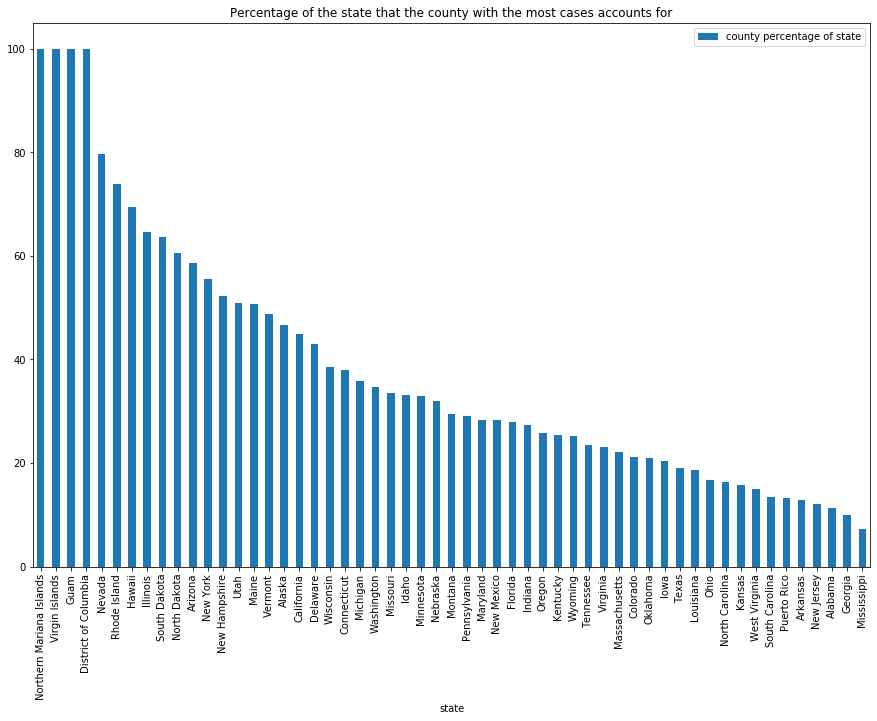

In [45]:
#graphing the percentage the county with the most cases in each state 
total_state_cases = county_cases.groupby('state')['cases in county'].sum()
total_state_cases = pd.DataFrame(total_state_cases.sort_values(ascending = False))
total_state_cases = total_state_cases.rename({'cases in county':'total'}, axis = 1)
total_state_cases

max_county_cases = max_county_cases.join(total_state_cases, how = 'left', on = 'state')

max_county_cases['county percentage of state'] = max_county_cases['cases in county']/max_county_cases['total']*100

max_county_cases = max_county_cases.sort_values(by = 'county percentage of state', ascending = False)

max_county_cases.plot(kind = 'bar', x = 'state', y = 'county percentage of state', figsize = (15,10), title = 'Percentage of the state that the county with the most cases accounts for')

max_county_cases








<Figure size 432x288 with 0 Axes>

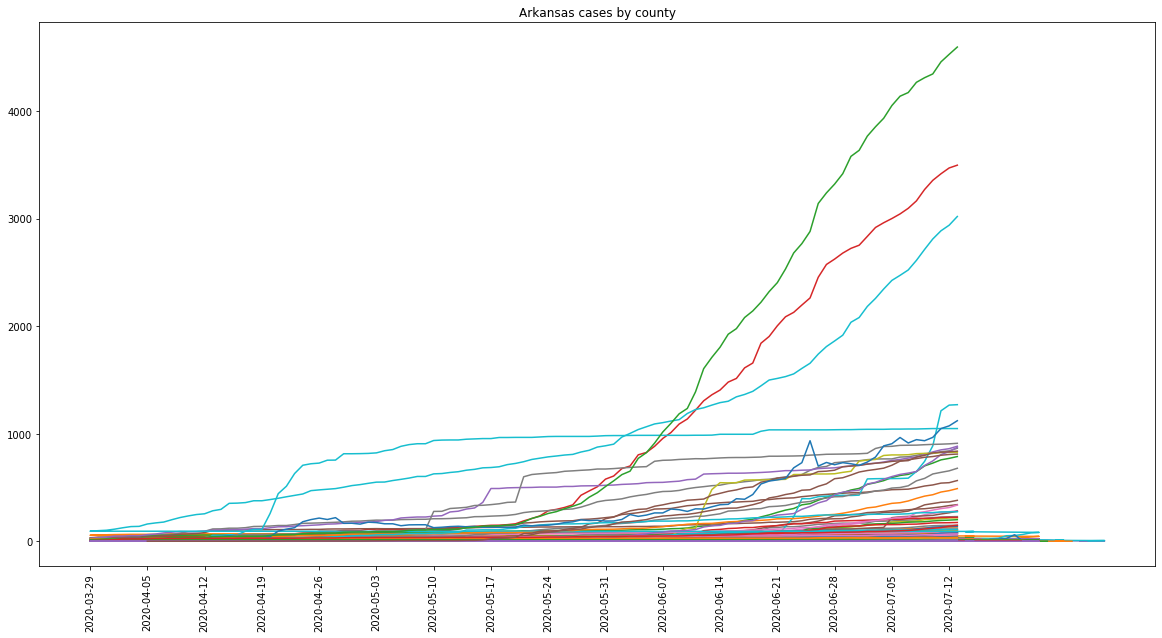

<Figure size 432x288 with 0 Axes>

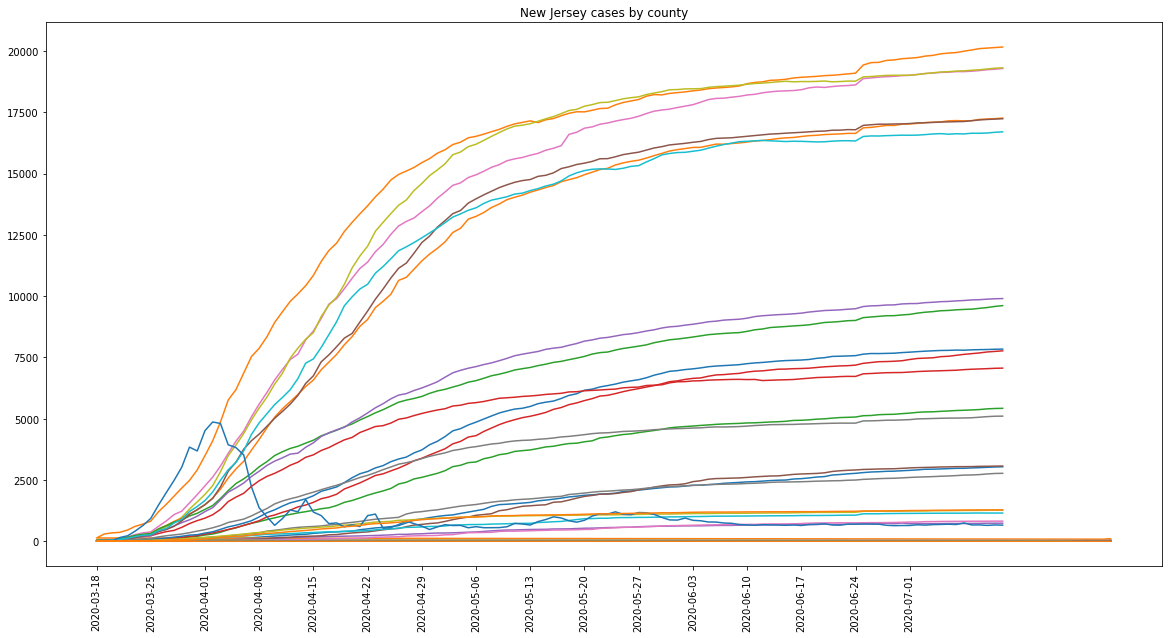

<Figure size 432x288 with 0 Axes>

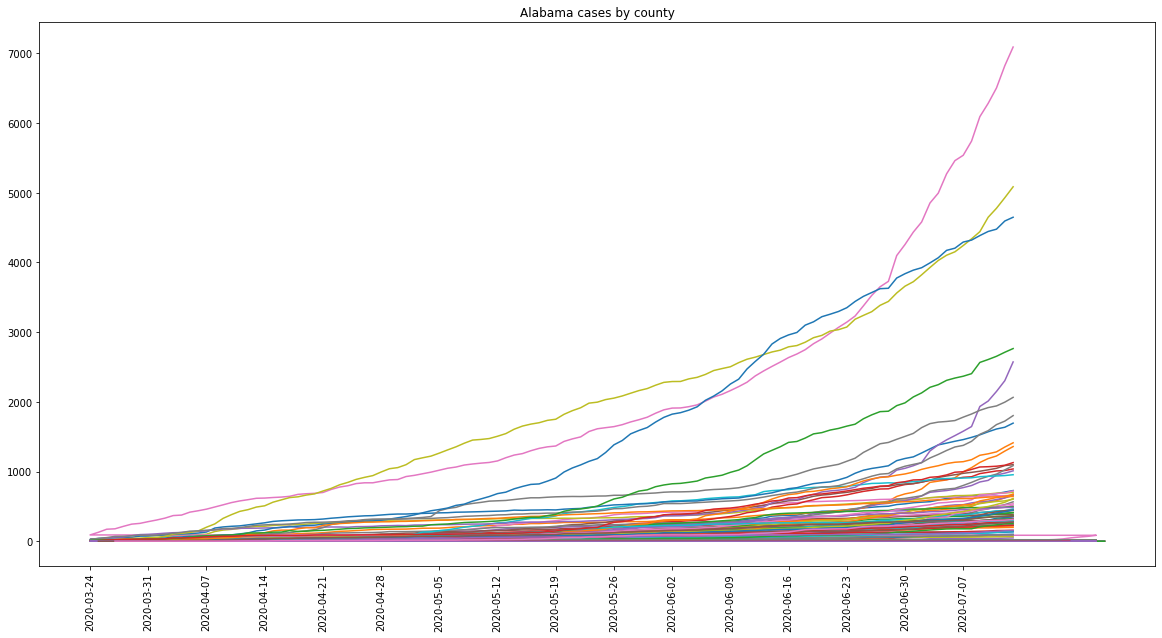

<Figure size 432x288 with 0 Axes>

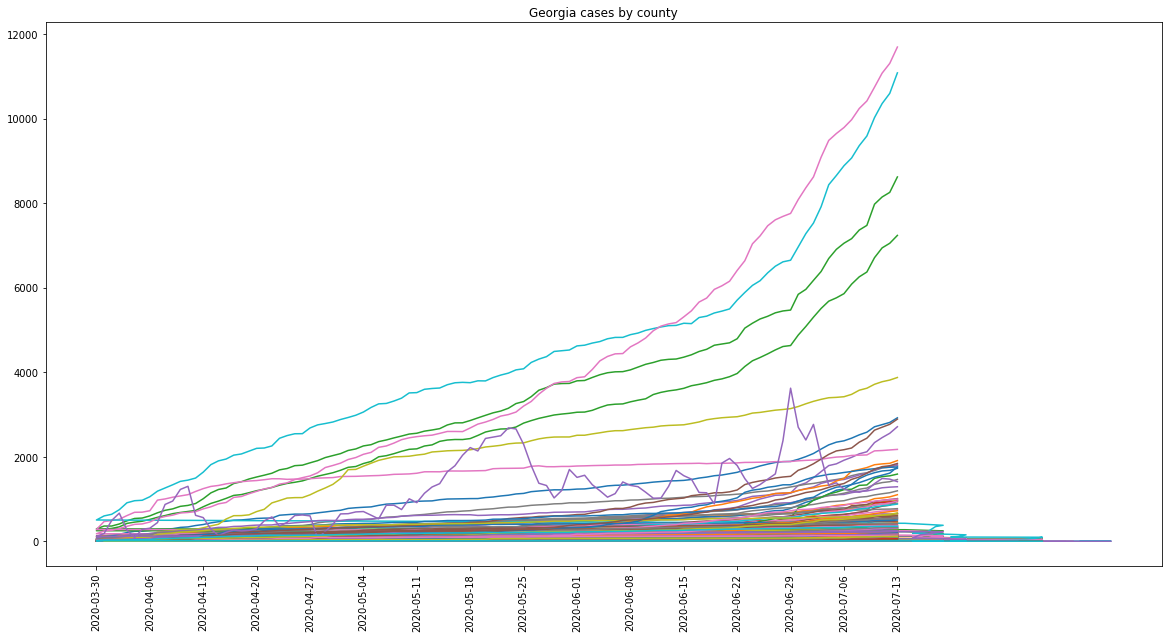

<Figure size 432x288 with 0 Axes>

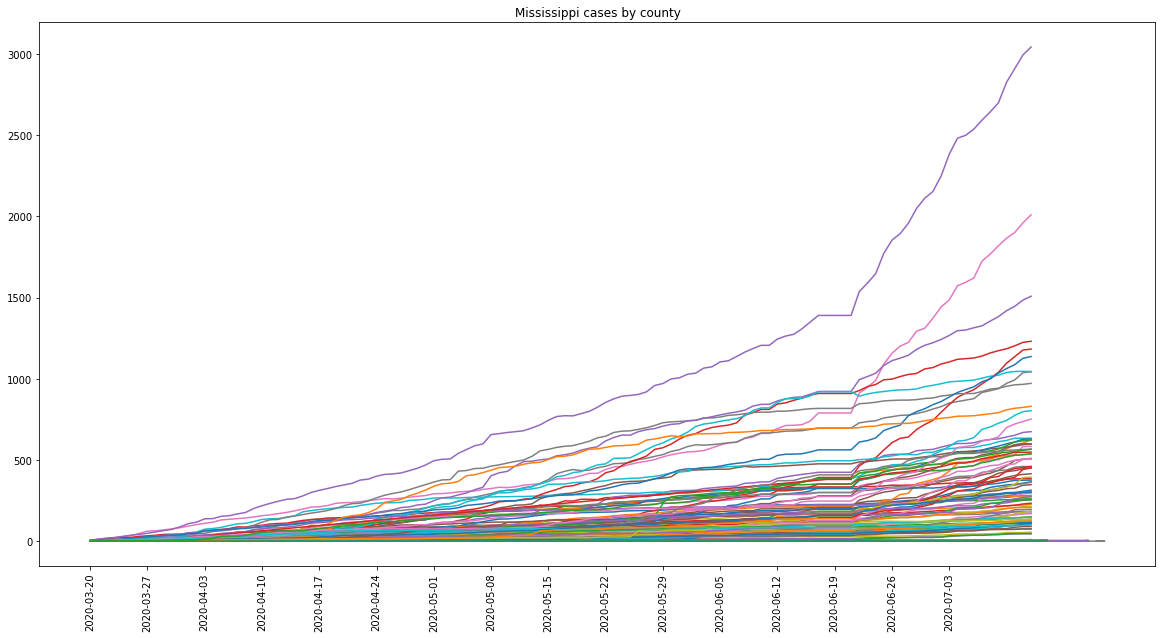

In [47]:
#graphing 5 states whose county with greatest number of cases does not makes up majority of covid-19 cases and the changes in cases in each of these county
county_cases_by_state = county_cases.groupby(['state', 'county', 'date']).first()
county_cases_by_state = county_cases_by_state.reset_index()

for state in ['Arkansas', 'New Jersey', 'Alabama', 'Georgia', 'Mississippi']:
    state_case = county_cases_by_state[county_cases_by_state['state'] == state]
    fig = plt.figure()
    plt.figure(figsize = (20,10))
    plt.title(state + ' cases by county')
    plt.xticks(rotation = 90)
   

    for county in state_case.county.unique():
        specific_county = state_case[state_case['county'] == county]
        plt.plot(specific_county['date'], specific_county['cases in county'], label = county)
        
        
    plt.xticks(np.arange(0, 107, 7))
        
        



In [48]:
#calculating per state how many of the counties leading the highest amounts of positive tests account for 50% or more of the total state tests
#creating a dataframe to compute this and displaying other information relevant to the calculations

state_case_description = pd.DataFrame(columns = ['state', 'counties', 'number of counties','total counties', 'case percentage of state', 'county percentage of state'])
for state in county_cases_by_state.state.unique():
    
    state_counties = county_cases_by_state[county_cases_by_state['state'] == state]
    state_counties = pd.DataFrame(state_counties.groupby('county')['cases in county'].sum())
    state_counties = state_counties.sort_values(by = 'cases in county', ascending = False).reset_index()
    state_total = total_state_cases[total_state_cases.index == state]['total']

    count = state_counties.loc[0,'cases in county']
    county_list = [state_counties.loc[0,'county']] 
    
    for i in range(1,len(state_counties.index)):
        
        if float((count + state_counties.loc[i,'cases in county']))/float(state_total) < 0.5:
            count = count + state_counties.loc[i,'cases in county']
            county_list.append(state_counties.loc[i,'county'])
                
            
        elif (float((count + state_counties.loc[i,'cases in county']))/float(state_total) > 0.5) & (float(count)/float(state_total) < 0.5):
            count = count + state_counties.loc[i,'cases in county']
            county_list.append(state_counties.loc[i,'county'])
            percentage = (len(county_list)/len(state_counties.county.unique())*100)
            state_case_description = state_case_description.append(pd.Series(data = {'state': state, 'counties': county_list, 'number of counties': len(county_list), 'total counties': len(state_counties.county.unique()), 'county percentage of state': percentage, 'case percentage of state': float(count)/float(state_total)*100}), ignore_index = True)
            break
        else:
            percentage = (len(county_list)/len(state_counties.county.unique())*100)
            state_case_description = state_case_description.append(pd.Series(data = {'state': state, 'counties': county_list, 'number of counties': len(county_list), 'total counties': len(state_counties.county.unique()), 'county percentage of state': percentage, 'case percentage of state': float(count)/float(state_total)*100}), ignore_index = True)
            break
            

state_case_description = state_case_description.sort_values(by = 'county percentage of state', ascending = False)
state_case_description



    

,state,counties,number of counties,total counties,case percentage of state,county percentage of state
7,Delaware,"[Sussex, New Castle]",2,4,84.441160,50.000000
29,New Jersey,"[Bergen, Hudson, Essex, Passaic, Union]",5,22,54.593395,22.727273
6,Connecticut,"[Fairfield, New Haven]",2,9,64.583061,22.222222
20,Massachusetts,"[Middlesex, Suffolk, Essex]",3,15,55.565820,20.000000
10,Hawaii,[Honolulu],1,5,69.395043,20.000000
23,Mississippi,"[Hinds, Madison, DeSoto, Lauderdale, Jones, Ne...",16,83,51.008687,19.277108
39,Rhode Island,[Providence],1,6,73.797273,16.666667
0,Alabama,"[Jefferson, Mobile, Montgomery, Tuscaloosa, Ma...",9,67,51.647647,13.432836
45,Vermont,"[Chittenden, Franklin]",2,15,58.277580,13.333333
40,South Carolina,"[Greenville, Richland, Charleston, Horry, Lexi...",6,46,51.389940,13.043478
